# Example of reading data from an Athena project files

The `larch.io.read_athena` function reads an Athena Project file and creates a Larch Group
with the contents.


In [2]:
# first some imports and printing of the help for the `read_athena` function.

from pathlib import Path
from larch.io import read_athena
help(read_athena)

Help on function read_athena in module larch.io.athena_project:

read_athena(filename, match=None, do_preedge=True, do_bkg=False, do_fft=False, use_hashkey=False)
    read athena project file
    returns a Group of Groups, one for each Athena Group in the project file
    
    Arguments:
        filename (string): name of Athena Project file
        match (string): pattern to use to limit imported groups (see Note 1)
        do_preedge (bool): whether to do pre-edge subtraction [True]
        do_bkg (bool): whether to do XAFS background subtraction [False]
        do_fft (bool): whether to do XAFS Fast Fourier transform [False]
        use_hashkey (bool): whether to use Athena's hash key as the
                       group name instead of the Athena label [False]
    
    Returns:
        group of groups each named according the label used by Athena.
    
    Notes:
        1. To limit the imported groups, use the pattern in `match`,
           using '*' to match 'all', '?' to match an

In [3]:
# let's read in an example Project File
cyano_filename = Path("..", "pca", "cyanobacteria.prj")
aprj = read_athena(cyano_filename)

# There are a few ways to explore the contents of the Groups
# First, if you just print the value it will print the names of the groups it contains
aprj

Group Name,Label/File Name,Selected
d_0_12,0.12,✔
d_2_42,2.42,✔
d_4_73,4.73,✔
d_7_03,7.03,✔
d_9_33,9.33,✔
d_20,20,✔
d_33,33,✔
d_720,720,✔
Au_foil,Au foil,✔
Au1_Cl,Au1 Cl,✔


In [4]:
# Second, there are a few special attributes, 
#   `groups`:  dictionary of Groups (with keys as shown in the Group Name column above
#   `filname`:  name of Project file
#   `header`:  header information from the Athena Project
#   `journal`: journal from the Athena Project
print(dir(aprj))
print(aprj.header)
print(aprj.filename)

['Au1_Cl', 'Au3_Cl_aq', 'Au_cyanide', 'Au_foil', 'Au_hydroxide', 'Au_sulphide', 'Au_thiocyanide', 'Au_thiomalate_aq', 'Au_thiosulphate_aq', 'd_0_12', 'd_20', 'd_2_42', 'd_33', 'd_4_73', 'd_720', 'd_7_03', 'd_9_33', 'filename', 'groups', 'header', 'journal']
# Athena project file -- Demeter version 0.9.21
# This file created at 2015-02-04T09:32:08
# Using Demeter 0.9.21 with perl 5.018002 and using Larch 0.9.24 on linux

../pca/cyanobacteria.prj


In [5]:
# the selection flag of a group can be controlled with the "sel" attribute
aprj.d_2_42.sel = 0
aprj.d_4_73.sel = 0
aprj.d_7_03.sel = 0
aprj.groups['d_9_33'].sel = 0 # accessible also as dictionary
aprj

Group Name,Label/File Name,Selected
d_0_12,0.12,✔
d_2_42,2.42,
d_4_73,4.73,
d_7_03,7.03,
d_9_33,9.33,
d_20,20,✔
d_33,33,✔
d_720,720,✔
Au_foil,Au foil,✔
Au1_Cl,Au1 Cl,✔


In [6]:
# show content of a single group
aprj.groups['d_33']

Attribute,Type,Value
energy,ndarray,"shape=(308,), type=float64 range=[ 11720.0008: 12889.8643]"
mu,ndarray,"shape=(308,), type=float64 range=[ 0.99556632: 1.51336593]"
athena_params,Group,
stddev,ndarray,"shape=(308,), type=float64 range=[ 3.8182e-05: 0.00293809]"
label,str,'33'
epsr,float,0.0
epsk,float,0.0
athena_id,str,'rjbc'
journal,Journal,"[('pre_edge_callargs', {'e0': 11919.045, 'step': None, 'nnorm': 3.0, 'nvict': 0.0, 'pre1': -150.0, 'pre2': -30.0, 'norm1': 50.0, 'norm2': 950.124674070001, 'make_flat': True}, '2024-03-10T15:52:46.707469')]"
e0,float64,11918.94434165


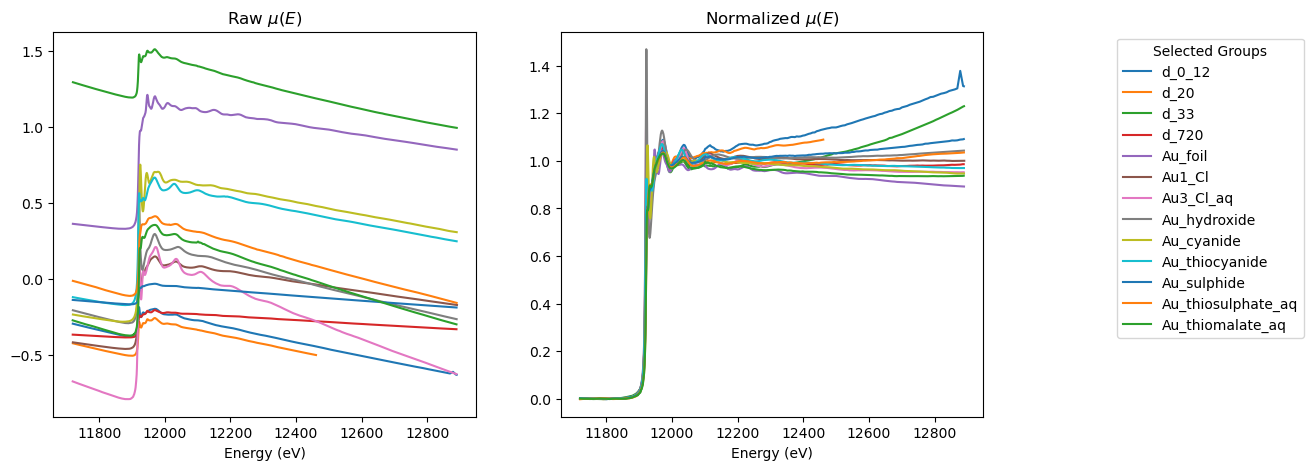

In [7]:
# example of how to iterate over selected Groups: normalize and plot

import matplotlib.pyplot as plt
from larch.xafs import pre_edge

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
for name, grp in aprj.groups.items():
    if grp.sel == 0:
        # use the sel flag to skip some Groups
        continue
    pre_edge(grp.energy, grp.mu, group=grp)
    ax = axs[0]
    ax.plot(grp.energy, grp.mu, label=name)
    ax.set_title(r"Raw $\mu(E)$")
    ax.set_xlabel("Energy (eV)")
    ax = axs[1]
    ax.plot(grp.energy, grp.norm, label=name)
    ax.set_title("Normalized $\mu(E)$")
    ax.set_xlabel("Energy (eV)")
    ax.legend(title="Selected Groups", bbox_to_anchor=(1.3, 1))